In [2]:
# Load the Pandas libraries with alias 'pd' 
%pylab inline
import pandas as pd
import matplotlib.pyplot as plt

Populating the interactive namespace from numpy and matplotlib


In [3]:
def getAcc(method, delay, lr):
    return f"data/acc_dm{method}_d{delay}_lr{lr}.csv" #acc_dmconstant_d1_lr0.01.csv

def getLoss(method, delay, lr):
    return f"data/loss_dm{method}_d{delay}_lr{lr}.csv"

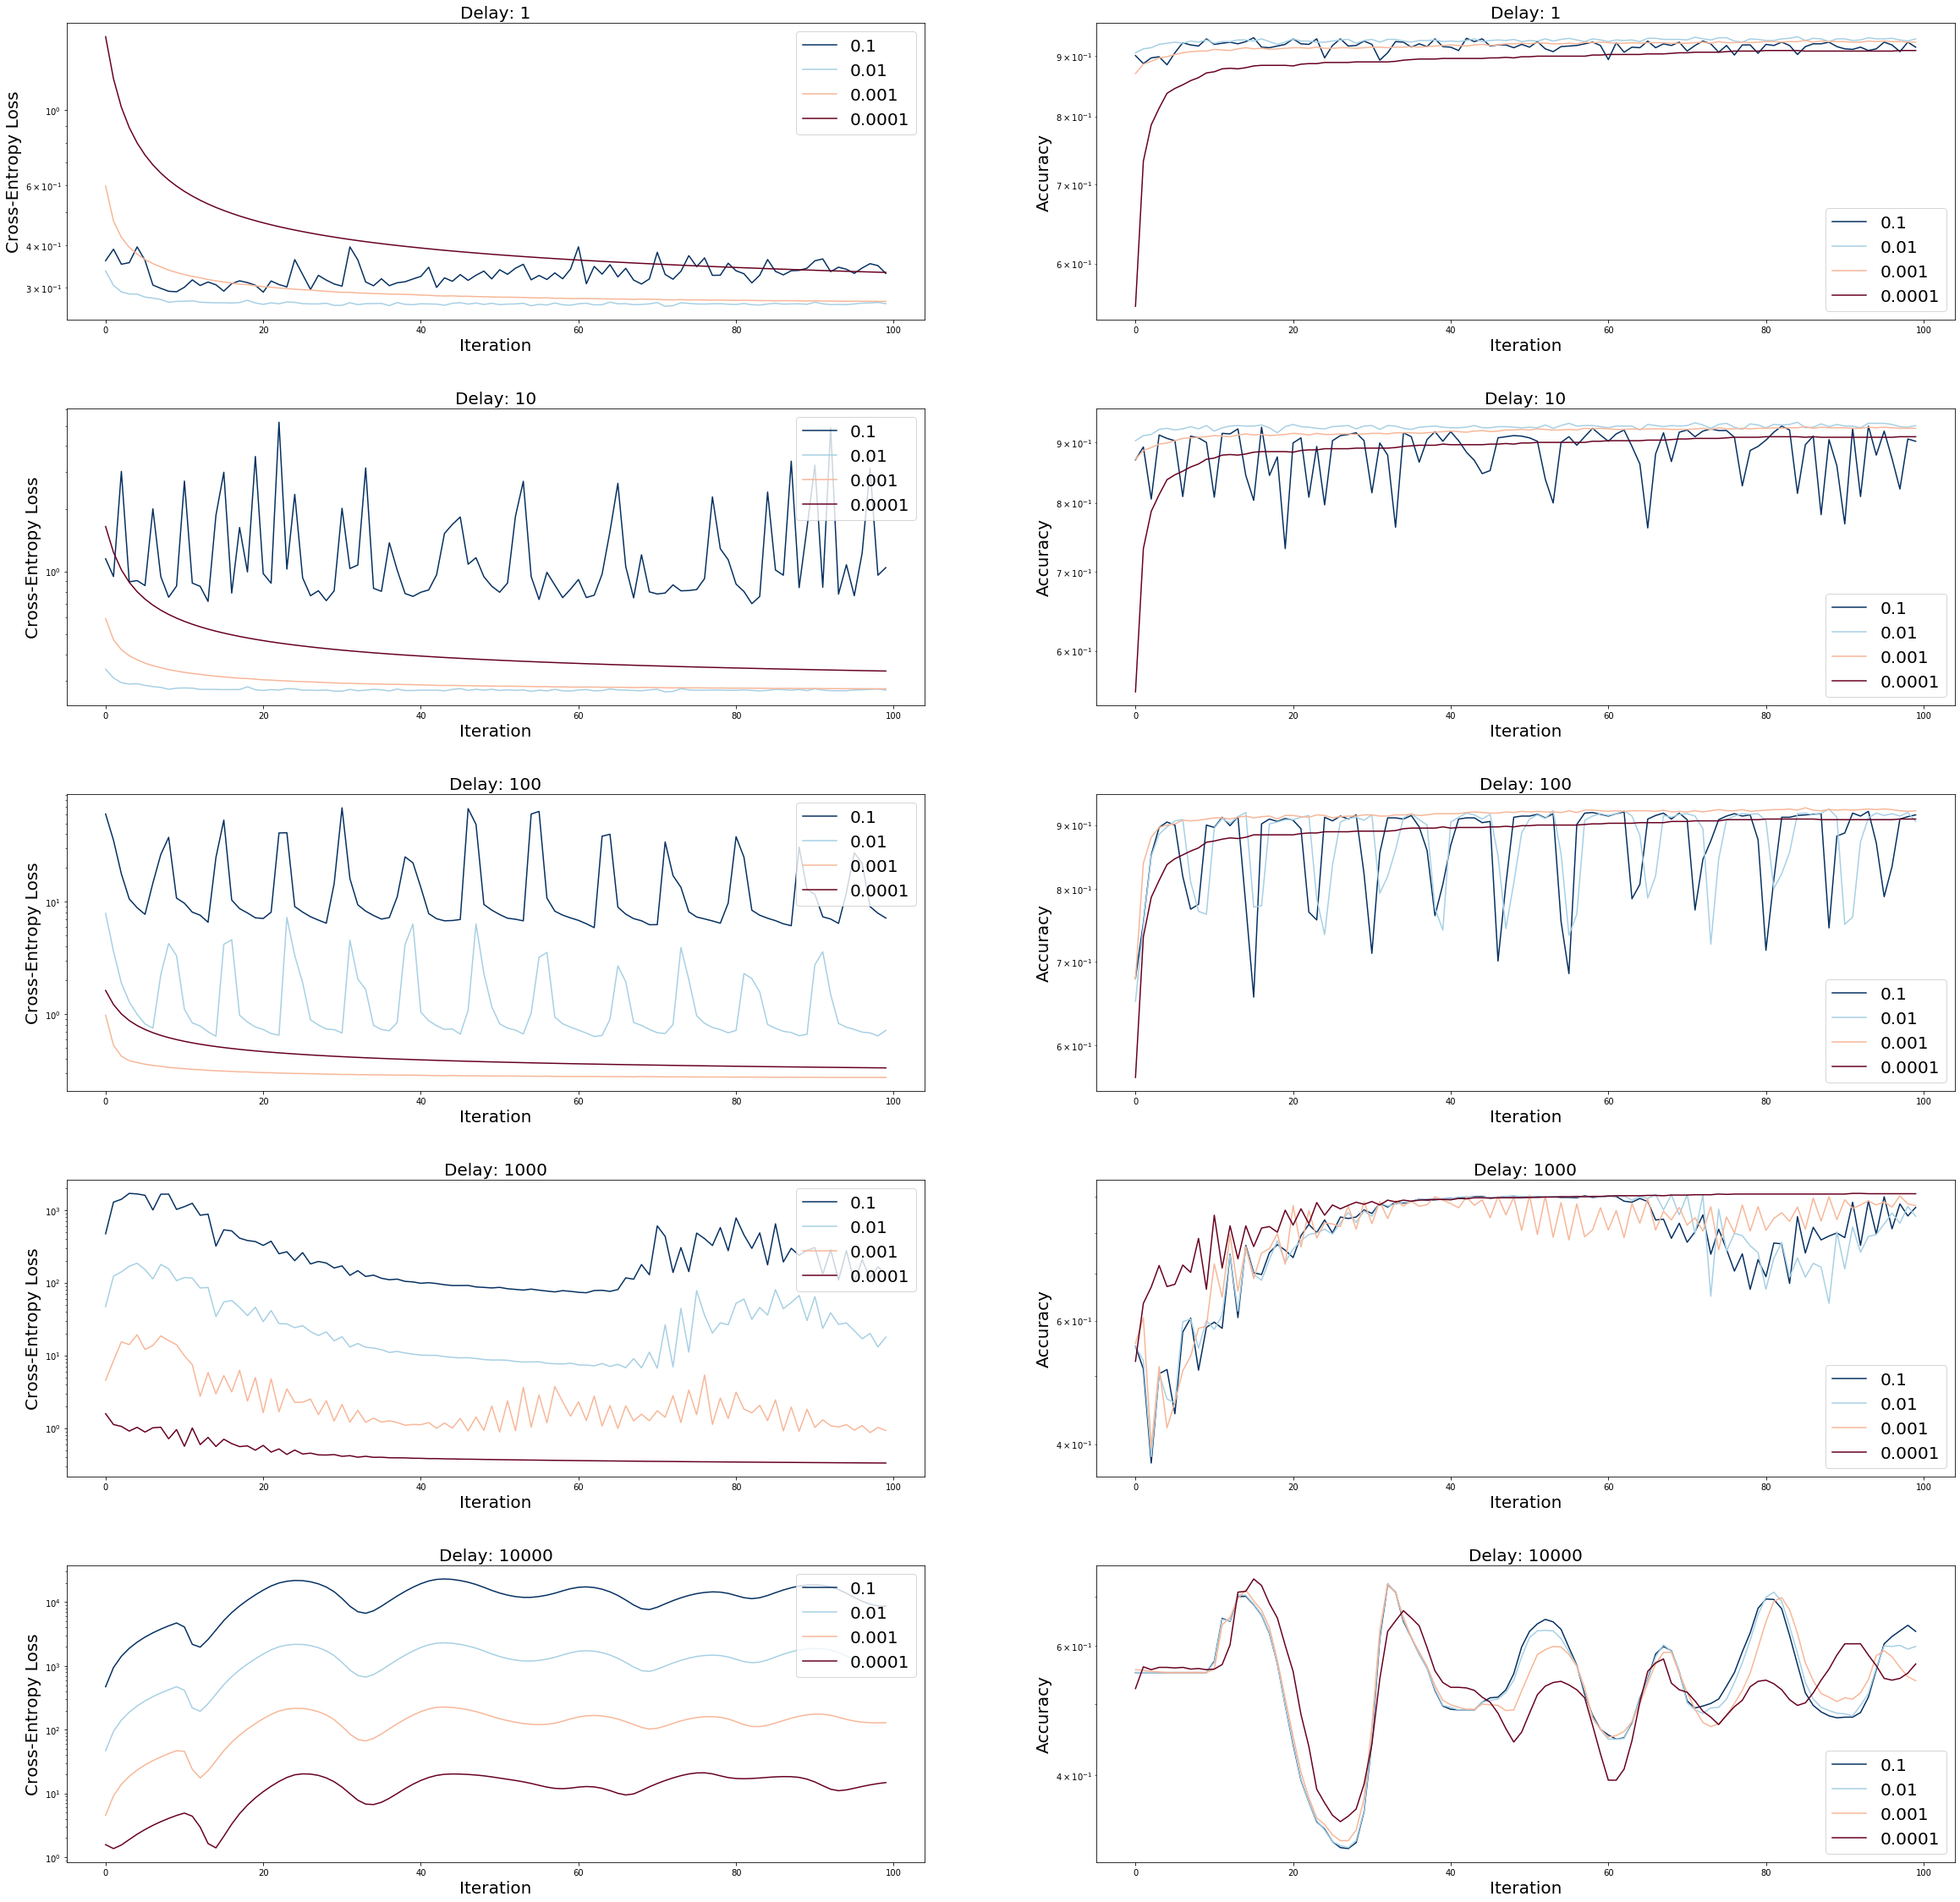

In [12]:
method = 'constant'
delays = [1, 10, 100, 1000, 10000]
lrs = [0.1, 0.01, 0.001, 0.0001]
colors = plt.cm.RdBu(np.linspace(0,1,len(lrs)))[::-1]

fig, ax = plt.subplots(len(delays), 2, figsize=(40, 40), gridspec_kw = {'wspace':0.2, 'hspace':0.3})
for row, delay in enumerate(delays):
    ax[row, 0].set_prop_cycle('color', colors)
    ax[row, 0].set_title(f"Delay: {delay}", size=20)
    ax[row, 0].set_yscale('log')
    ax[row, 0].set_xlabel('Iteration', size=20)
    ax[row, 0].set_ylabel('Cross-Entropy Loss', size=20)
    for lr in lrs:
        data = pd.read_csv(getLoss(method, delay, lr), header=None)
        ax[row, 0].plot(data, label=lr)
    ax[row, 0].legend(loc='upper right', fontsize="20")
        
    ax[row, 1].set_prop_cycle('color', colors)
    ax[row, 1].set_title(f"Delay: {delay}", size=20)
    ax[row, 1].set_yscale('log')
    ax[row, 1].set_xlabel('Iteration', size=20)
    ax[row, 1].set_ylabel('Accuracy', size=20)
    for lr in lrs:
        data = pd.read_csv(getAcc(method, delay, lr), header=None)
        ax[row, 1].plot(data, label=lr)
    ax[row, 1].legend(loc='lower right', fontsize="20")
    
fig.savefig(f"/Users/rene/University/master/thesis/thesis/figures/sgd_plots.pdf", bbox_inches='tight')